In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_pepsi = pd.read_csv("../databases/PEPSIR_raw_LF_perfect.csv", sep=";")
data_pepsi = data_pepsi.loc[data_pepsi['Q']>100]

data_hydro = pd.read_csv("../databases/HYDROSWOT_100m_V3.csv", sep=";")
data_hydro = data_hydro.loc[data_hydro['Q']>100]

print('Hydro -> Missing Data : ',data_hydro.isna().sum().sum(), '  Shape is : ', data_hydro.shape)

print('Pepsi -> Missing Data : ',data_pepsi.isna().sum().sum(), '  Shape is : ', data_pepsi.shape)

Hydro -> Missing Data :  17   Shape is :  (12222, 41)
Pepsi -> Missing Data :  0   Shape is :  (51338, 21)


In [3]:
river_means_pepsi=data_pepsi.groupby("river", as_index=False).mean()
river_medians_pepsi=data_pepsi.groupby("river", as_index=False).median()

In [4]:
print(river_means_pepsi.river[river_means_pepsi['Q']>10000])
river_means_pepsi['Q'].describe()

5                    Jamuna
8     MississippiDownstream
21                    Padma
Name: river, dtype: object


count       29.000000
mean      3996.163655
std       7052.717460
min        198.389412
25%        503.491760
50%       1033.050154
75%       3830.904487
max      31534.985385
Name: Q, dtype: float64

In [5]:
print("Hydro : \n" , data_hydro['Q'].describe(),'\n')
print("Pepsi : \n" , data_pepsi['Q'].describe(),'\n')

Hydro : 
 count    12222.000000
mean      1523.568067
std       3341.338780
min        100.241637
25%        227.101110
50%        524.169324
75%       1194.970926
max      40661.082301
Name: Q, dtype: float64 

Pepsi : 
 count     51338.000000
mean       3286.339838
std        8536.605592
min         100.000909
25%         312.306849
50%         834.827500
75%        2340.421800
max      112874.671429
Name: Q, dtype: float64 



In [6]:
river_means_hydro=data_hydro.groupby("river", as_index=False).mean()
river_medians_hydro=data_hydro.groupby("river", as_index=False).median


In [7]:
site_no_means_hydro=data_hydro.groupby("site_no", as_index=False).mean()
site_no_means_hydro.describe()

,site_no,lon,lat,flowacc,stage,W,dH,dA,U,A0,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
count,3.590000e+02,359.000000,359.00000,3.590000e+02,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02,359.000000,359.000000,359.000000,359.000000
mean,8.970073e+11,-91.290306,39.75493,1.220920e+05,8.157683,216.370671,2.512906,512.834958,0.809511,457.472453,...,0.550703,2.422869,3.975407e+05,2.025596e+05,9.759543e+04,3.901124e+07,9255.099283,5814.113245,4963.825993,893.557989
std,1.699573e+13,12.015328,4.72712,3.420185e+05,23.155306,163.861610,5.740414,1204.059933,0.323660,967.701665,...,2.742359,4.350082,1.507093e+06,7.622355e+05,3.601863e+05,1.476726e+08,46683.190766,31705.024856,28247.680144,1908.796742
min,1.010500e+06,-123.250000,28.30000,3.392884e+02,-1.181100,59.020558,0.078334,8.752912,0.093269,0.143096,...,0.000000,0.000000,9.861740e+02,2.097644e+02,5.000988e+01,1.040462e+05,8.000095,4.949603,2.830617,101.688911
25%,3.066500e+06,-95.670000,36.60000,1.012815e+04,2.104834,129.210664,0.989650,152.604681,0.573357,78.709497,...,0.000000,0.223140,2.573851e+04,1.566866e+04,8.298075e+03,2.780590e+06,925.815418,508.487464,420.153454,277.599486
50%,5.442300e+06,-90.910000,40.12000,2.139071e+04,3.435604,163.060075,1.633863,235.822341,0.767524,159.827637,...,0.000000,1.454545,5.224533e+04,2.956175e+04,1.621507e+04,5.273867e+06,1900.239078,1213.896390,1006.740137,416.311609
75%,7.143838e+06,-82.710000,42.74500,6.204316e+04,5.505562,229.798117,2.709182,417.587184,1.012566,324.982795,...,0.000000,2.677686,1.309546e+05,7.147017e+04,4.075554e+04,1.247220e+07,4663.854267,2774.903025,2136.999209,659.876841
max,3.220231e+14,-68.150000,48.99000,2.929652e+06,228.620726,1166.417058,91.670124,13637.773873,2.110740,7997.323546,...,31.958678,44.165289,1.646012e+07,8.927901e+06,4.408456e+06,1.706087e+09,755677.906564,533601.821402,468129.398524,20366.127626


In [8]:
print(river_means_hydro.Q[river_means_hydro['Q']>1000].describe())
river_means_hydro['Q'].describe()

count      14.000000
mean     2856.353735
std      2420.557987
min      1130.544901
25%      1236.728666
50%      1773.947310
75%      2716.061461
max      7888.527805
Name: Q, dtype: float64


count     153.000000
mean      650.895959
std      1014.226844
min       102.554840
25%       300.855423
50%       415.582285
75%       632.816853
max      7888.527805
Name: Q, dtype: float64

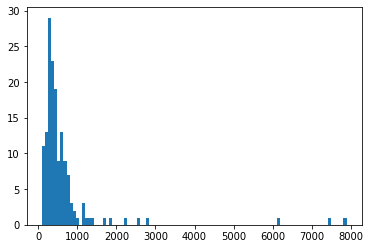

In [11]:
plt.hist(river_means_hydro['Q'],bins=100)
plt.show()